In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('OASIS3_UDSb1_physical_eval.csv')

In [4]:
df.drop('HEARWAID', axis=1, inplace=True)

In [5]:
# impute the missing values to the mean of the column
df.fillna(df.mean(), inplace=True)

C:\Users\Ananya\AppData\Local\Temp\ipykernel_9888\3216825617.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [6]:
df.isnull().sum()

OASISID                0
OASIS_session_label    0
days_to_visit          0
age at visit           0
WEIGHT                 0
HEIGHT                 0
BPSYS                  0
BPDIAS                 0
HRATE                  0
VISION                 0
VISCORR                0
VISWCORR               0
HEARING                0
HEARAID                0
dtype: int64

In [7]:
df.drop('OASISID', axis=1, inplace=True)
df.drop('OASIS_session_label', axis=1, inplace=True)

##### Scaling the data

In [8]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

##### Finding optimal number of clusters

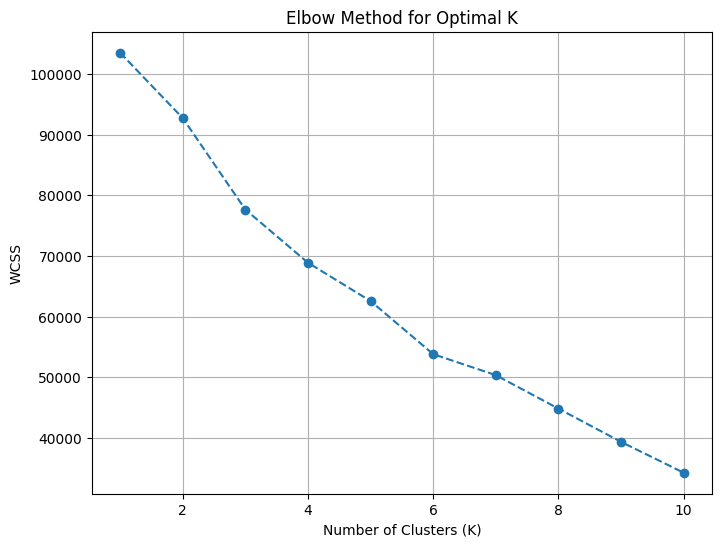

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# WCSS (Within-Cluster-Sum-of-Squares) calculation for different K values
wcss = []
for i in range(1, 11):  # Try K values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

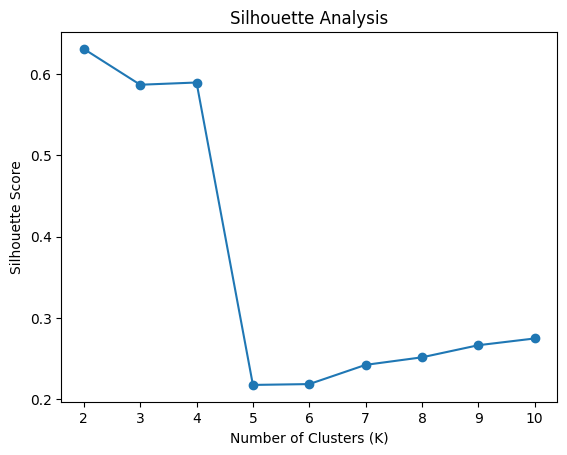

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you want to test a range of K values (e.g., from 2 to 10)
k_values = range(2, 11)
silhouette_scores = []

# Perform silhouette analysis for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


##### Choosing K = 2
##### K-Means Clustering

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Choose the optimal K value and perform K-Means clustering
k = 2  # Replace with your chosen K value
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters
# You can use scatter plots or other visualization techniques

# Print the cluster assignments
print(df['Cluster'].value_counts())


1    8217
0     409
Name: Cluster, dtype: int64


In [12]:
df.head()

,days_to_visit,age at visit,WEIGHT,HEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,Cluster
0,0,65.19,999.0,999.0,138.0,70.0,72.0,1.0,1.0,1.0,1.0,0.0,1
1,339,66.12,155.0,64.0,138.0,72.0,78.0,0.0,1.0,1.0,1.0,0.0,1
2,722,67.17,162.0,64.0,144.0,80.0,60.0,0.0,1.0,1.0,1.0,0.0,1
3,1106,68.22,167.0,63.5,130.0,82.0,68.0,0.0,1.0,1.0,1.0,0.0,1
4,1456,69.18,173.0,63.5,142.0,70.0,72.0,1.0,1.0,1.0,1.0,0.0,1


In [13]:
df['Cluster'].value_counts()

1    8217
0     409
Name: Cluster, dtype: int64

##### Splitting

In [19]:
# split data where Cluster is the target variable
x = df.drop('Cluster', axis=1)
y = df['Cluster']

# split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

##### SMOTE

In [25]:
# apply smote on train data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
x_train, y_train = sm.fit_resample(x_train, y_train)

##### Models

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds (k)
k = 10  # You can change this to the desired number of folds

# Initialize KFold with 'k' splits
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []
model = RandomForestClassifier(random_state=42)

# Your machine learning model training and testing code goes here
for train_index, test_index in kf.split(x_train):  # Use x_train for cross-validation
    # X_train, X_test = x_train[train_index], x_train[test_index]  # Separate training and testing data
    # y_train, y_test = y_train[train_index], y_train[test_index]  # Separate training and testing labels
    
    # Train your model on X_train and y_train
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracy to the list
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy and standard deviation
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the results
print("Accuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Accuracy Scores for each fold: [0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237, 0.999072786277237]
Mean Accuracy: 0.9990727862772368
Standard Deviation of Accuracy: 1.1102230246251565e-16
